In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
geo_data = pd.read_csv("D:/STUDIES/Projects/Data Analysis/Brazilian E-commerce Data Analysis/Data/Raw/olist_geolocation_dataset.csv")

In [4]:
geo_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [5]:
geo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [6]:
geo_data.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

<Axes: xlabel='geolocation_state', ylabel='count'>

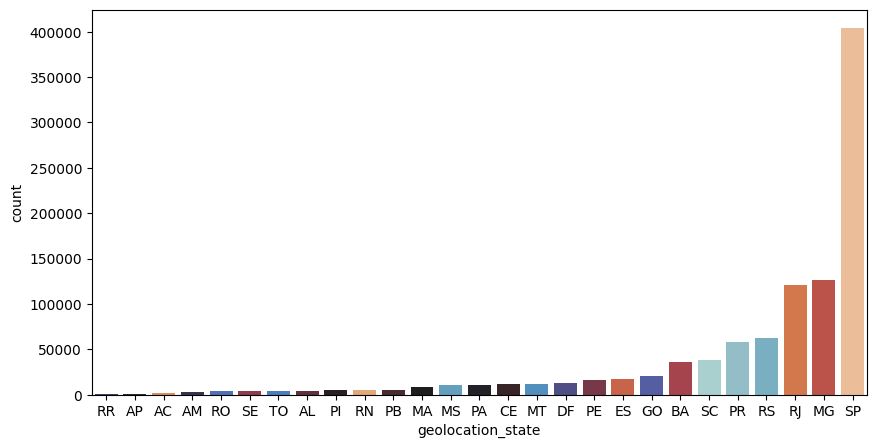

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x ='geolocation_state', data=geo_data, 
              order=geo_data['geolocation_state'].value_counts().sort_values().index, 
              palette='icefire_r', hue='geolocation_state')

In [8]:
geo_data['geolocation_city'].value_counts()

geolocation_city
sao paulo         135800
rio de janeiro     62151
belo horizonte     27805
são paulo          24918
curitiba           16593
                   ...  
sao bras               1
são brás               1
ibitiranga             1
quixabá                1
maceia³                1
Name: count, Length: 8011, dtype: int64

In [12]:
lat = geo_data['geolocation_lat']
lon = geo_data['geolocation_lng']

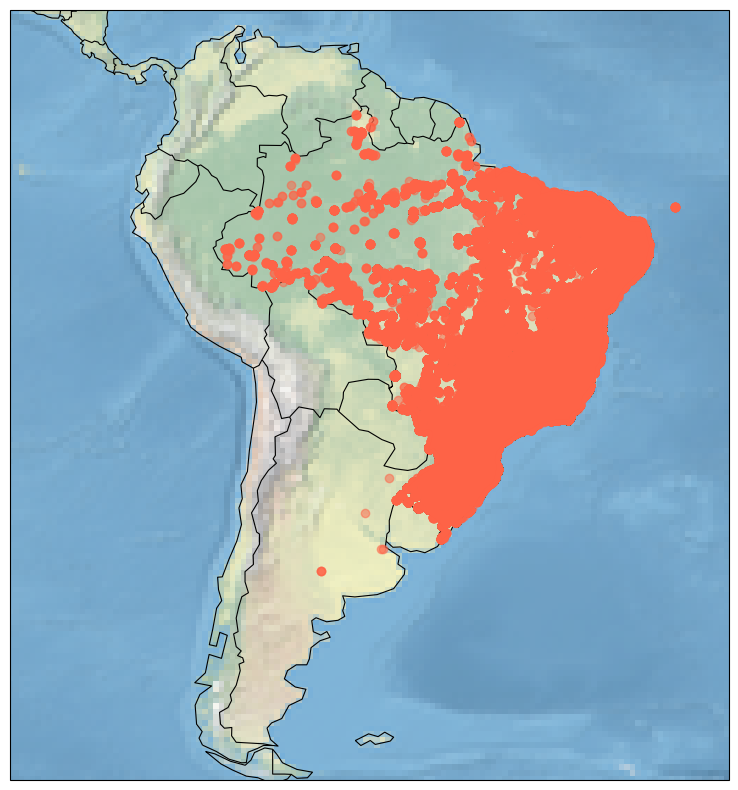

In [11]:
# Create figure and axis with PlateCarree (lat/lon)
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# Set map extent (lon_min, lon_max, lat_min, lat_max)
ax.set_extent(
    [-92.269176, -27.581676, -55.401805, 13.884615],
    crs=ccrs.PlateCarree()
)

# Background (Basemap bluemarble equivalent)
ax.stock_img()

# Map boundary / ocean & land color
ax.add_feature(cfeature.OCEAN, facecolor='#46bcec')
ax.add_feature(cfeature.LAND, facecolor='#f2f2f2')

# Draw countries
ax.add_feature(cfeature.BORDERS, linewidth=0.8)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)

# Scatter points (lon, lat must be in degrees)
ax.scatter(
    lon, lat,
    transform=ccrs.PlateCarree(),
    zorder=10,
    alpha=0.5,
    color='tomato'
)

plt.show()